#  PLANT DISEASE CLASSIFICATION 

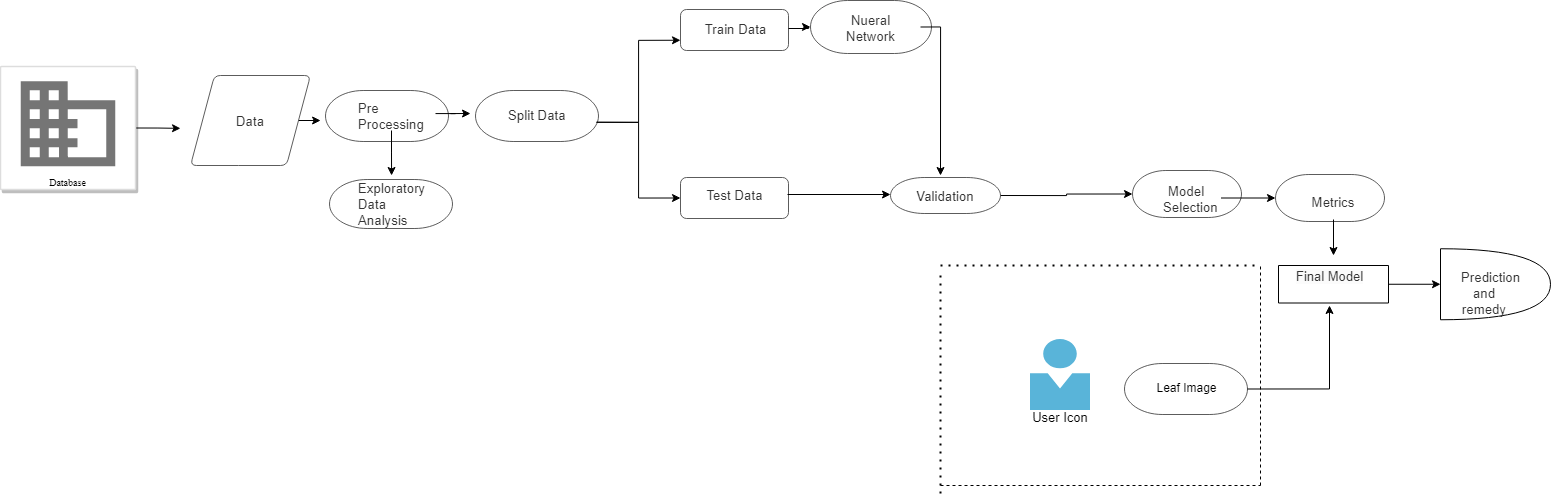

In [1]:
from IPython import display
display.Image("/Users/manoj/Desktop/Sem-5/Capstone/Project/Phase-2/flowchart.png")

## Importing necessary libraries

In [60]:
import os                      
import numpy as np            
import pandas as pd           
import torch                    
import matplotlib.pyplot as plt 
import torch.nn as nn          
from torch.utils.data import DataLoader 
from PIL import Image         
import torch.nn.functional as F 
import torchvision.transforms as transforms    
from torchvision.utils import make_grid       
from torchvision.datasets import ImageFolder  
from torchsummary import summary
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import seaborn as sns


%matplotlib inline

## Loading the datasets and Performing EDA

In [61]:
directory = "/Users/manoj/Downloads/archive (1)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_directory = directory + "/train"
test_directory = directory + "/valid"

In [62]:
diseases = os.listdir(train_directory)
# printing the disease names
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', '.DS_Store', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

In [63]:
print("Total number of disease classes are: {}".format(len(diseases)))

Total number of disease classes are: 39


## Performing Preprocessing of the lables of the data to extract the plant and the diseases related to it

Below we are extracting all the unique plants and diseases present in the dataset

In [64]:
plant_type = []
Num_of_Diseases = 0
for plant in diseases:
    if '___' in plant:
        parts = plant.split('___')
        if parts[0] not in plant_type:
            plant_type.append(parts[0])
        if parts[1] != 'healthy':
            Num_of_Diseases += 1

The list of unique plants present in our data are:

In [65]:
print(f"The types of Unique Plants in the dataset are: \n{plant_type}")

The types of Unique Plants in the dataset are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']


In [66]:
# number of unique plants
print("Total Number of plants: {}".format(len(plant_type)))

Total Number of plants: 14


The list of number of diseases present in the dataset are:

In [67]:
print("Total Number of diseases are: {}".format(Num_of_Diseases))

Total Number of diseases are: 26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [68]:
number_of_images = {}
for disease in diseases:
    directory_disease = os.path.join(train_directory, disease)
    if os.path.isdir(directory_disease):
        number_of_images[disease] = len(os.listdir(directory_disease))

images_by_class = pd.DataFrame(number_of_images.values(), index=number_of_images.keys(), columns=["Number of images present"])
images_by_class

Number of images present
Strawberry___healthy                                                    1824
Grape___Black_rot                                                       1888
Potato___Early_blight                                                   1939
Blueberry___healthy                                                     1816
Corn_(maize)___healthy                                                  1859
Tomato___Target_Spot                                                    1827
Peach___healthy                                                         1728
Potato___Late_blight                                                    1939
Tomato___Late_blight                                                    1851
Tomato___Tomato_mosaic_virus                                            1790
Pepper,_bell___healthy                                                  1988
Orange___Haunglongbing_(Citrus_greening)                                2010
Tomato___Leaf_Mold                                                      1882
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                              1722
Cherry_(including_sour)___Powdery_mildew                                1683
Apple___Cedar_apple_rust                                                1760
Tomato___Bacterial_spot                                                 1702
Grape___healthy                                                         1692
Tomato___Early_blight                                                   1920
Corn_(maize)___Common_rust_                                             1907
Grape___Esca_(Black_Measles)                                            1920
Raspberry___healthy                                                     1781
Tomato___healthy                                                        1926
Cherry_(including_sour)___healthy                                       1826
Tomato___Tomato_Yellow_Leaf_Curl_Virus                                  1961
Apple___Apple_scab                                                      2016
Corn_(maize)___Northern_Leaf_Blight                                     1908
Tomato___Spider_mites Two-spotted_spider_mite                           1741
Peach___Bacterial_spot                                                  1838
Pepper,_bell___Bacterial_spot                                           1913
Tomato___Septoria_leaf_spot                                             1745
Squash___Powdery_mildew                                                 1736
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot                      1642
Apple___Black_rot                                                       1987
Apple___healthy                                                         2008
Strawberry___Leaf_scorch                                                1774
Potato___healthy                                                        1824
Soybean___healthy                                                       2022

#### Visualizing the above information on a graph

#color and sub heading and titile and order of lables

<function matplotlib.pyplot.show(close=None, block=None)>

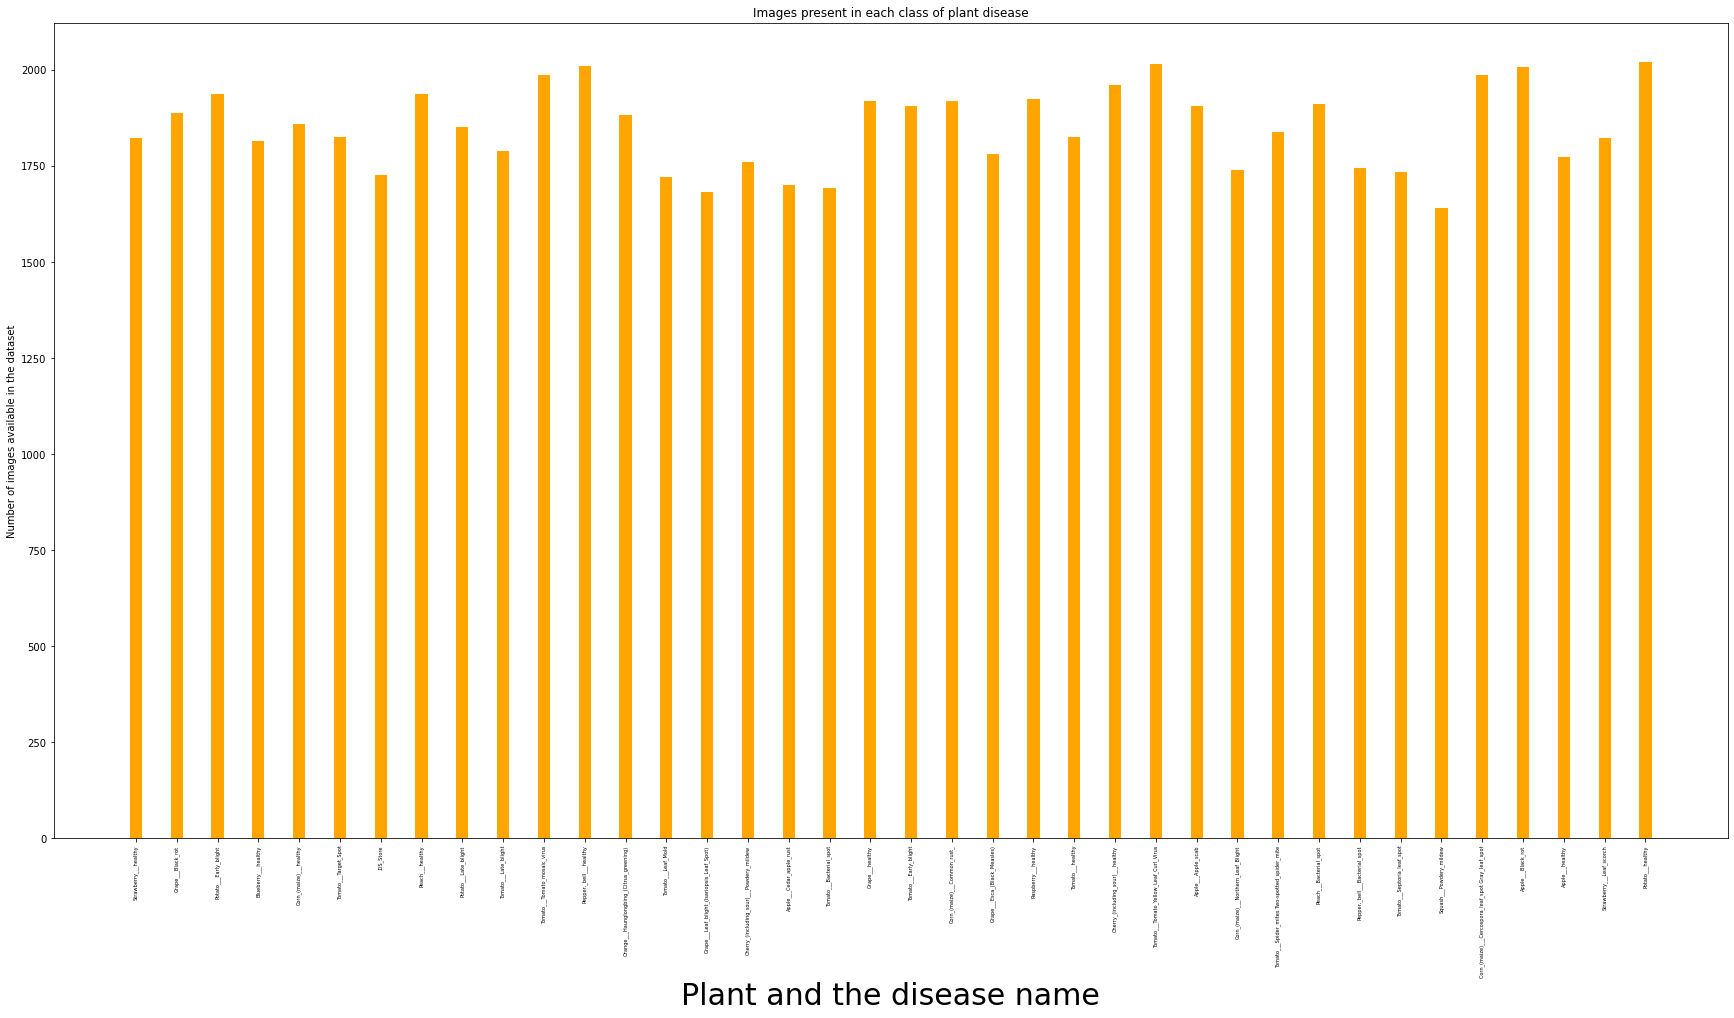

In [92]:
index = [n for n in range(38)]
plt.figure(figsize=(30, 15))
plt.title('Images present in each class of plant disease')
plt.bar(index, [n for n in number_of_images.values()], width=0.3, color='orange')
plt.xlabel('Plant and the disease name', fontsize=30)
plt.ylabel('Number of images available in the dataset', fontsize=10)
plt.xticks(index, diseases[:-1], fontsize=5, rotation=90) 
plt.show

In [70]:
def create_data_frame(path):
    list_plant=[]
    list_category=[]
    list_disease=[]
    list_path=[]
    list_plant_category=[]
    list_image_size=[]
    list_image_type=[]
    list_size=[]
    
    for path,directory,files in os.walk(path,topdown=False):
        for name in files:
            if not name.startswith('.'):  # exclude hidden files
                plant_category=category=path.split("/")[-1]
                plant=plant_category.split("___")[0]
                category=plant_category.split("___")[-1]
                disease=0 if category=="healthy" else 1
                full_path=path+"/"+name
                image_type=name.split(".")[1]
                size=os.path.getsize(full_path)
                with Image.open(full_path) as images:
                    width,height=images.size
                list_plant.append(plant)
                list_category.append(category)
                list_disease.append(disease)
                list_path.append(full_path)
                list_plant_category.append(plant_category)
                list_image_size.append(str(width)+"x"+str(height))
                list_image_type.append(image_type)
                list_size.append(size)
    
        data_info=pd.DataFrame.from_dict({"Plant":list_plant,"Category":list_category,"Disease":list_disease,
                           "Path":list_path,"Plant_Category":list_plant_category,"Image_size":list_image_size,"Image_type":list_image_type,"Size":list_size},orient="columns")

    image_count_info=pd.DataFrame(data_info.groupby(["Plant","Category","Plant_Category"]).size())
    image_count_info.rename(columns={0:"nb"},inplace=True)
    image_count_info=image_count_info.reset_index()
    return data_info,image_count_info


In [71]:
train_data_info,train_data_count=create_data_frame(train_directory)
valid_data_info,valid_data_count=create_data_frame(test_directory)

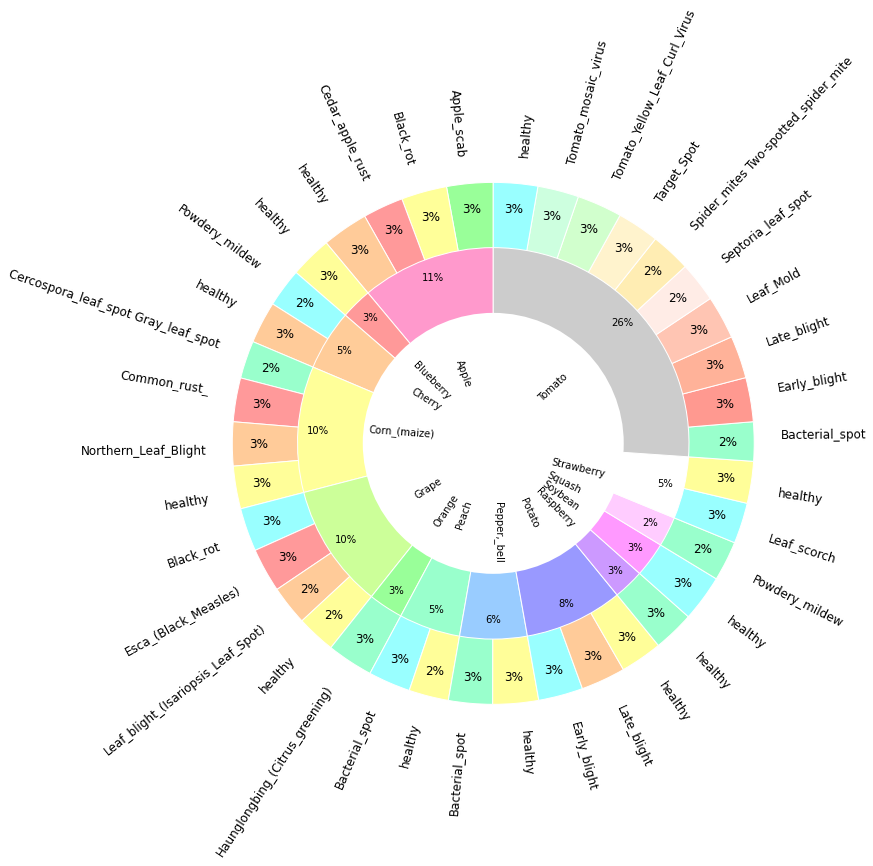

In [72]:
def  class_data_distribution(class_data_count,class_data_info):
    list_plant_mod= ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(class_data_count.Plant.unique())]


    pi_chart_color_0 = ['#ff99cc' ,'#ff9999',
'#ffcc99',
'#ffff99',
'#ccff99',
'#99ff99',
'#99ffcc',
'#99ccff',
'#9999ff',
'#cc99ff',
'#ff99ff',
'#ffccff',
'#ffffff',
'#cccccc',]
    pi_chart_color_1 = ['#99ff99',
'#ffff99',
'#ff999a',
'#ffcb99',
'#fffe99',
'#99ffff',
'#ffcb99',
'#99ffcc',
'#ff999a',
'#ffcb99',
'#fffe99',
'#99ffff',
'#ff999a',
'#ffcb99',
'#fffe99',
'#99ffcc',
'#99ffff',
'#fffe99',
'#99ffcc',
'#fffe99',
'#99ffff',
'#ffcb99',
'#fffe99',
'#99ffcc',
'#99ffff',
'#99ffcc',
'#99ffff',
'#fffe99',
'#99ffcc',
'#ff9990',
'#ffb299',
'#ffc5b3',
'#ffece6',
'#ffedb3',
'#fff3cd',
'#d1ffcd',
'#cdffdf',
'#99ffff',]
 

    plt.pie(class_data_count.nb, labels=class_data_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=pi_chart_color_1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 12})
    plt.pie(class_data_info.groupby(['Plant']).size(),labels=list_plant_mod,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=pi_chart_color_0,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%1.f%%',pctdistance=0.90, textprops={'fontsize': 10})
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
 
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12,12))
class_data_distribution(train_data_count,train_data_info)

From the above diagram we can that the data is mostly balanced across all classes, so we can move forward with preprocessing and training the data

#### Number of Images present in the training dataset

In [73]:
n_train = 0
for value in number_of_images.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


## Preparation of Data for training 

In [74]:
# datasets for validation and training
train_data = ImageFolder(train_directory, transform=transforms.ToTensor())
validation_data = ImageFolder(test_directory, transform=transforms.ToTensor()) 

#### Image shape 

In [75]:
img, label = train_data[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [76]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train_data.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

EDA of train data

Label :Apple___Apple_scab(0)


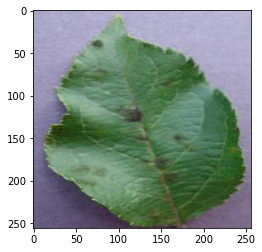

In [77]:
show_image(*train_data[0])

Label :Apple___Cedar_apple_rust(2)


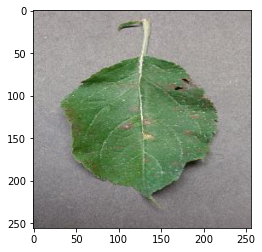

In [79]:
show_image(*train_data[4500])

Label :Blueberry___healthy(4)


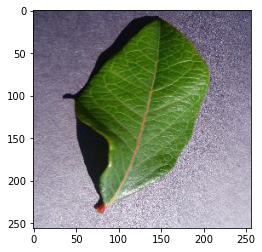

In [81]:
show_image(*train_data[9000])

Label :Corn_(maize)___Common_rust_(8)


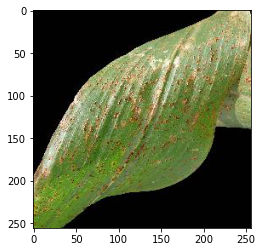

In [82]:
show_image(*train_data[15000])

Label :Tomato___Tomato_Yellow_Leaf_Curl_Virus(35)


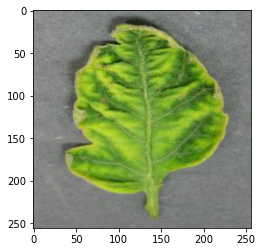

In [83]:
show_image(*train_data[65000])

In [84]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

Below we are considering the batch_size as '32', it refers to the number of images processed in a single forward propagation of a CNN. 

In [85]:
# setting the batch size
batch_size = 32

In [86]:
# DataLoaders for training and validation
dataloader_train = DataLoader(train_data, batch_size, shuffle=True, num_workers=2, pin_memory=True)
dataloader_validation = DataLoader(validation_data, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. Since, Kaggle provides a 2 core CPU, I have set it to 2


In [87]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

New function (below)

In [88]:
import matplotlib.pyplot as plt

def show_image(image, label, classes):
    class_name = classes[label]
    print(f"Label: {class_name} ({label})")
    plt.imshow(image.permute(1, 2, 0))

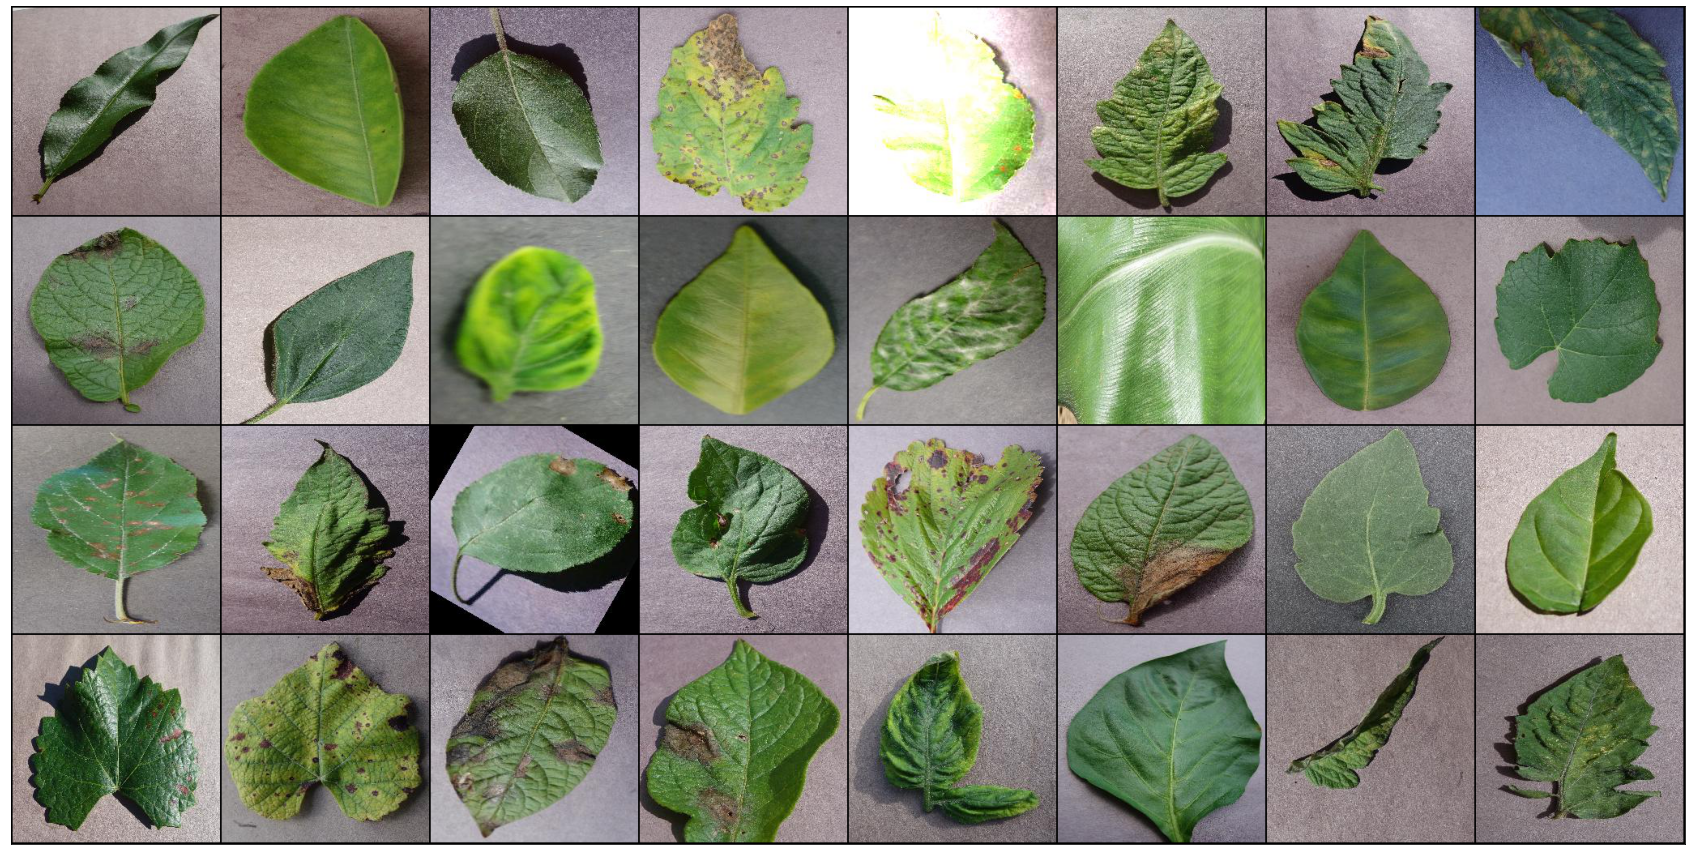

In [89]:
# Images for first batch of training
show_batch(dataloader_train) 

#  Modelling

#### Some helper functions

In [22]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

changes below

In [23]:
import torch

# Function to check for available devices and return the default device
def get_default_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Function to move data to a specified device
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Class to wrap a dataloader and move data to a specified device
class DeviceDataLoader:
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
        
    def __iter__(self):
        for batch in self.dataloader:
            yield to_device(batch, self.device)
        
    def __len__(self):
        return len(self.dataloader)


Checking the device we are working with

change the variable name

In [24]:
# to check the device we are working with
device = get_default_device()
device

device(type='cpu')

In [25]:
# Moving data into GPU by wrapping the data using DeviceDataloader to transfer batches of data to the GPU if or when available
dataloader_train = DeviceDataLoader(dataloader_train, device)
dataloader_validation = DeviceDataLoader(dataloader_validation, device)

## Building the model architecture 

#### Residual Block code implementation

In [26]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x 

In [27]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                
        loss = F.cross_entropy(out, labels) 
        acc = accuracy(out, labels)      
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

Changes below:

In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    correct_predictions = sum(preds == labels)
    accuracy = correct_predictions.item() / len(preds)
    return accuracy

## Final architecture

In [33]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True)
        self.conv4 = ConvBlock(256, 512, pool=True) 
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): 
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

In [34]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True) if torch.cuda.is_available() else data


In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = to_device(ResNet9(3, len(train_data.classes)), device)

In [37]:
model = to_device(ResNet9(3, len(train_data.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

*Getting a nicely formatted summary of our model (like in Keras). Pytorch doesn't support it natively. So, we need to install the `torchsummary` library (discussed earlier)*

In [38]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True) if torch.cuda.is_available() else data


In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = to_device(ResNet9(3, len(train_data.classes)), device)

In [ ]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

In [42]:
print(summary(model, (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

# Training the model

In [43]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
    

Let's check our validation loss and accuracy

In [91]:
%%time
history = [evaluate(model, dataloader_validation)]
history

Since there are randomly initialized weights, that is why accuracy come to near 0.019 (that is 1.9% chance of getting the right answer or you can say model randomly chooses a class).
Now, declare some hyper parameters for the training of the model. We can change it if result is not satisfactory.

In [ ]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

Let's start training our model ....

Note: The following cell may take 15 mins to 45 mins to run depending on your GPU. In kaggle (P100 GPU) it took around 20 mins of Wall Time.

In [ ]:
# %%time
# history += fit_OneCycle(epochs, max_lr, model, dataloader_train, dataloader_validation, 
#                              grad_clip=grad_clip, 
#                              weight_decay=1e-4, 
#                              opt_func=opt_func) 

## Plotting the results of the above model

In [37]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x',color='red')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx',color ='green')
    plt.plot(val_losses, '-rx', color = 'red')
    plt.xlabel('epoch')
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

## Validation Accuracy

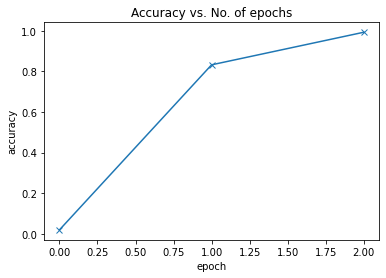

In [38]:
plot_accuracies(history)

## Validation loss

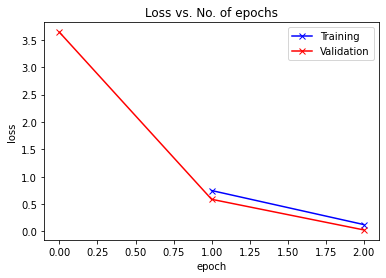

In [39]:
plot_losses(history)

## Learning Rate overtime

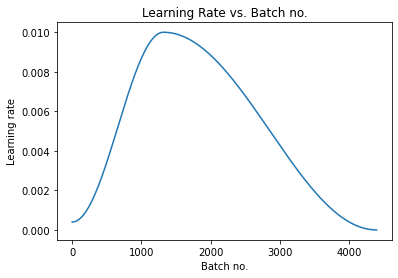

In [40]:
plot_lrs(history)

#  Testing model on test data 

**We only have 33 images in test data, so let's check the model on all images**

In [41]:
test_dir = "../input/new-plant-diseases-dataset/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [42]:
test_images = sorted(os.listdir(test_dir + '/test'))
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [43]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train_data.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


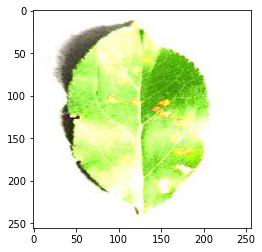

In [44]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [45]:
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

**We can see that the model predicted all the test images perfectly!!!!**

# Saving the model

In [46]:
PATH = '/Users/manoj/Desktop/Sem-5/Capstone/Project/Crop-Recommendation-and-Disease-Prediction'  
torch.save(model.state_dict(), PATH)

In [47]:
PATH = '/Users/manoj/Desktop/Sem-5/Capstone/Project/Crop-Recommendation-and-Disease-Prediction'
torch.save(model, PATH)